In [1]:
import re
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

In [2]:
# Define paths
folder_path = "../Llama3_1_Model_2/topicGPT/data/output/FINAL_SUMMARY"  # Change this to your folder path

# List of unique ideologies
ideologies = ["ANTI_SJW", "ANTI_THEIST", "BLACK", "CONSPIRACY", "LGBT", "LIBERTARIAN", "MRA", "PARTISAN_RIGHT", "PARTISAN_LEFT", "QANON", "RELIGIOUS_CONSERVATIVE", "SOCIAL_JUSTICE", "SOCIALIST", "WHITE_IDENTITARIAN"]

# Regular expression pattern to match the topic and count
pattern = re.compile(r"\[1\] (.+?) \(Count: (\d+)\):")

# Initialize dictionary to store period -> ideology -> {topic -> count}
data_dict = {"before": {}, "after": {}}  # Initialize both periods

for period in ["after", "before"]:
    for ideology in ideologies:
        # Combine Markdown Files
        md_filename = f"generation_1_{period}_{ideology}.md"  # Construct Markdown filename
        md_file_path = os.path.join(folder_path, md_filename)
    
        if os.path.exists(md_file_path):
            # Initialize inner dictionary for each ideology under the current period
            data_dict[period][ideology] = {}
            
            with open(md_file_path, "r", encoding="utf-8") as f:
                # Read the .md file line by line
                for line in f:
                    matches = pattern.findall(line)
                    for match in matches:
                        topic = match[0].strip()  # Extract topic name
                        count = int(match[1].strip())  # Extract count
                        
                        # Store topic and count in the dictionary under the current ideology
                        data_dict[period][ideology][topic] = count
        else:
            print(f"Markdown file not found: {md_filename}")

In [3]:
specific_topics = ["Politics", "Government", "Community", "Human Rights", "Identity", "Social Justice", "Culture", "Human Behavior", "Education", "Relationships", "Personal Growth", "Society", "Health", "Economy", "Law Enforcement", "Social Commentary", "Media", "Faith", "Leadership", "History"]

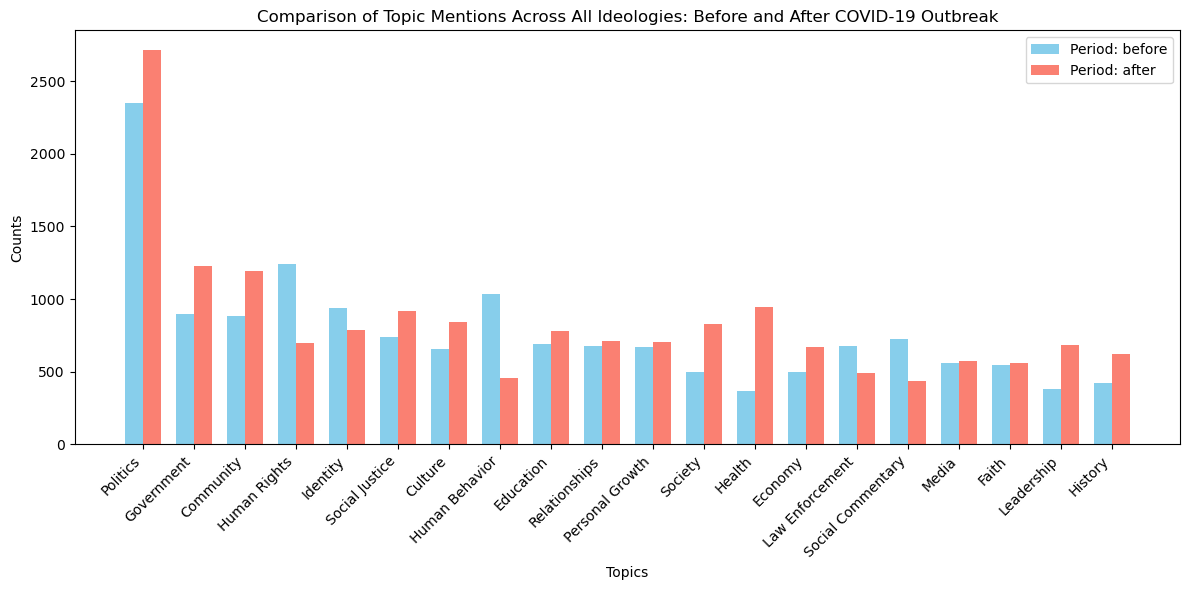

In [4]:
# Extract counts for the 10 specific topics
def extract_counts(data, period, topics):
    counts = []
    for topic in topics:
        # Sum the count of each topic across all ideologies
        total_count = sum(data[period][ideology].get(topic, 0) for ideology in data[period])
        counts.append(total_count)
    return counts

# Get counts for "before" and "after" periods
before_counts = extract_counts(data_dict, "before", specific_topics)
after_counts = extract_counts(data_dict, "after", specific_topics)

# Plot the comparison between "before" and "after" COVID
x = np.arange(len(specific_topics))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, before_counts, width=bar_width, label='Period: before', color='skyblue')
plt.bar(x + bar_width, after_counts, width=bar_width, label='Period: after', color='salmon')

# Labeling
plt.xlabel('Topics')
plt.ylabel('Counts')
plt.title('Comparison of Topic Mentions Across All Ideologies: Before and After COVID-19 Outbreak')
plt.xticks(x + bar_width / 2, specific_topics, rotation=45, ha="right")
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

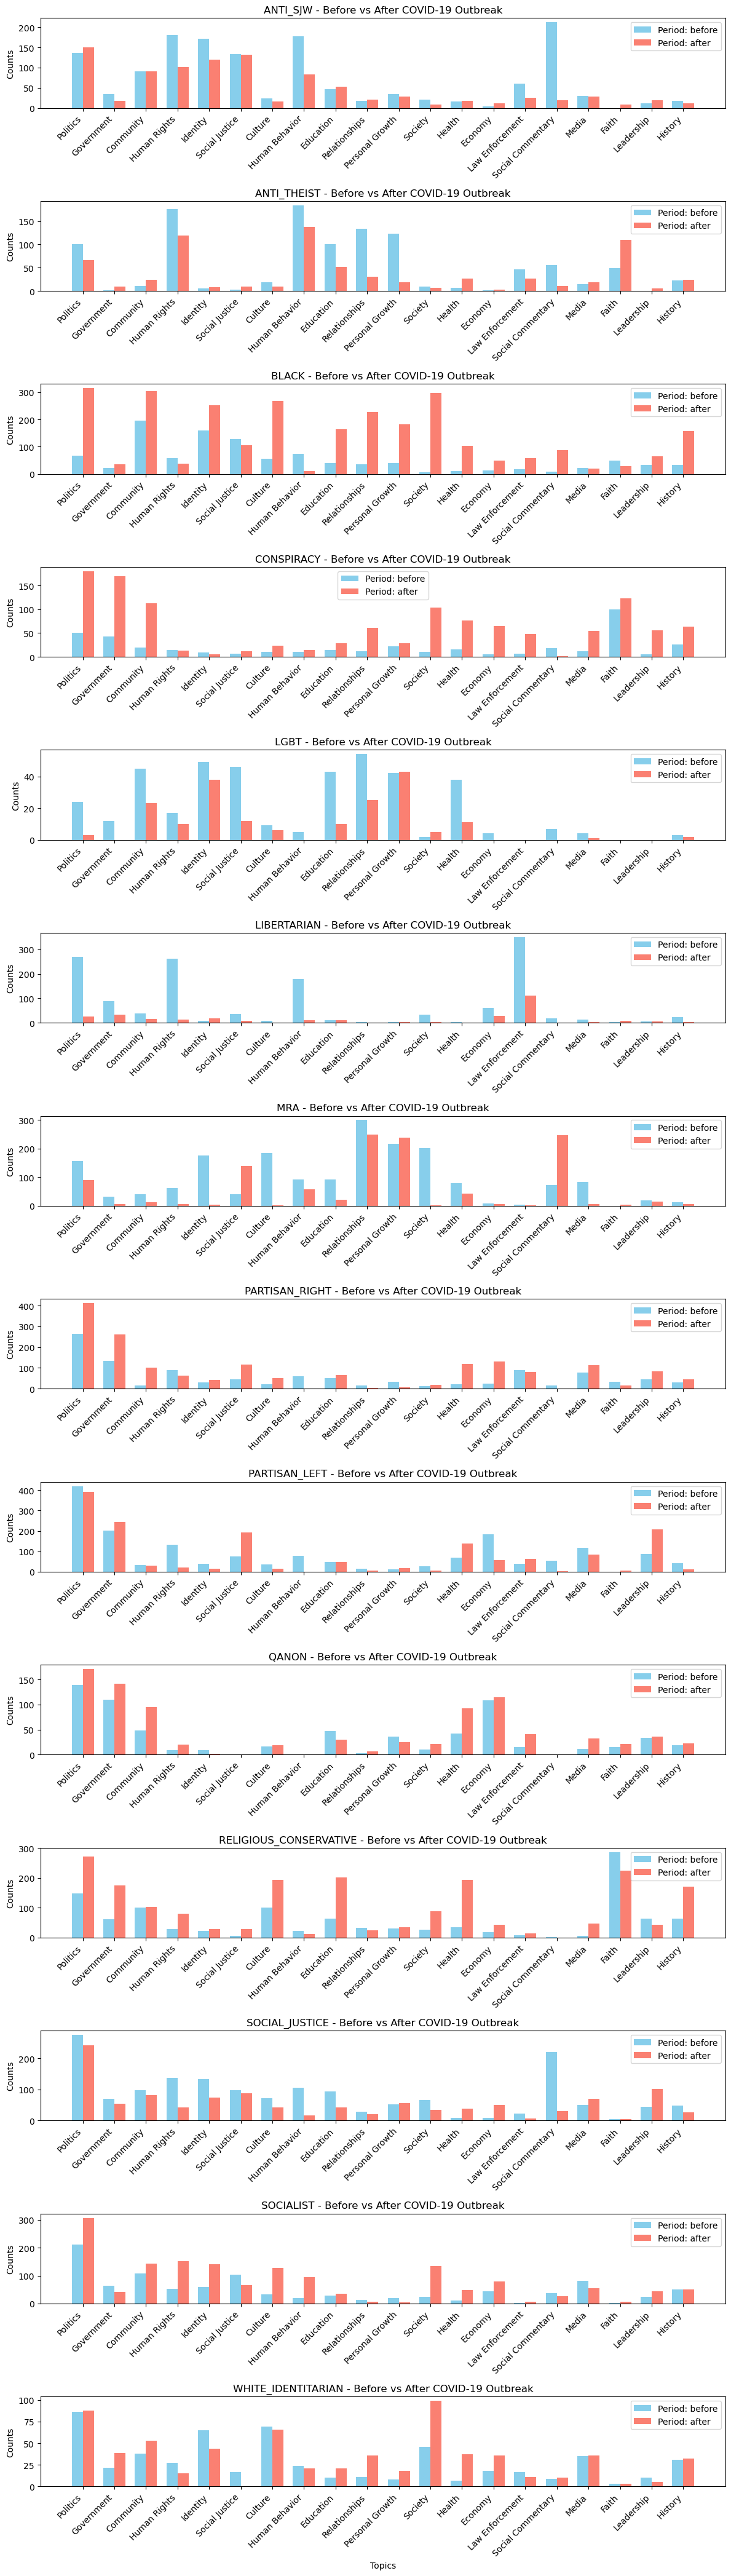

In [5]:
# Create subplots for each ideology
fig, axes = plt.subplots(len(ideologies), 1, figsize=(12, len(ideologies) * 3))

# Loop through each ideology and plot
for idx, ideology in enumerate(ideologies):
    before_counts = [data_dict["before"][ideology].get(topic, 0) for topic in specific_topics]
    after_counts = [data_dict["after"][ideology].get(topic, 0) for topic in specific_topics]
    
    ax = axes[idx]
    x = np.arange(len(specific_topics))
    
    ax.bar(x, before_counts, width=bar_width, label='Period: before', color='skyblue')
    ax.bar(x + bar_width, after_counts, width=bar_width, label='Period: after', color='salmon')
    
    ax.set_ylabel('Counts')
    ax.set_title(f'{ideology} - Before vs After COVID-19 Outbreak')
    ax.legend()
    
    # Add x labels (topics) to each subplot
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(specific_topics, rotation=45, ha="right")

# General labels and formatting
plt.xlabel('Topics')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from scipy.special import kl_div
from scipy.spatial.distance import jensenshannon

# Function to calculate the probability distribution from counts
def get_prob_distribution(counts):
    total = sum(counts)
    return [count / total for count in counts]

# Extract topics and initialize JS divergence results
topics = specific_topics
js_divergence_results = {}

# Calculate JS divergence for each ideology
for ideology in ideologies:
    # Extract counts for before and after periods
    before_counts = [data_dict["before"].get(ideology, {}).get(topic, 0) for topic in topics]
    after_counts = [data_dict["after"].get(ideology, {}).get(topic, 0) for topic in topics]
    
    # Convert counts to probability distributions
    before_prob = get_prob_distribution(before_counts)
    after_prob = get_prob_distribution(after_counts)
    
    # Calculate JS divergence
    js_divergence = jensenshannon(before_prob, after_prob)
    
    # Store result
    js_divergence_results[ideology] = js_divergence

# Print JS divergence results
for ideology, js_value in js_divergence_results.items():
    print(f"Ideology: {ideology}, JS Divergence: {js_value:.4f}")


Ideology: ANTI_SJW, JS Divergence: 0.2190
Ideology: ANTI_THEIST, JS Divergence: 0.2584
Ideology: BLACK, JS Divergence: 0.3266
Ideology: CONSPIRACY, JS Divergence: 0.2647
Ideology: LGBT, JS Divergence: 0.2514
Ideology: LIBERTARIAN, JS Divergence: 0.3193
Ideology: MRA, JS Divergence: 0.4170
Ideology: PARTISAN_RIGHT, JS Divergence: 0.2547
Ideology: PARTISAN_LEFT, JS Divergence: 0.2876
Ideology: QANON, JS Divergence: 0.1360
Ideology: RELIGIOUS_CONSERVATIVE, JS Divergence: 0.2211
Ideology: SOCIAL_JUSTICE, JS Divergence: 0.2558
Ideology: SOCIALIST, JS Divergence: 0.2264
Ideology: WHITE_IDENTITARIAN, JS Divergence: 0.2033


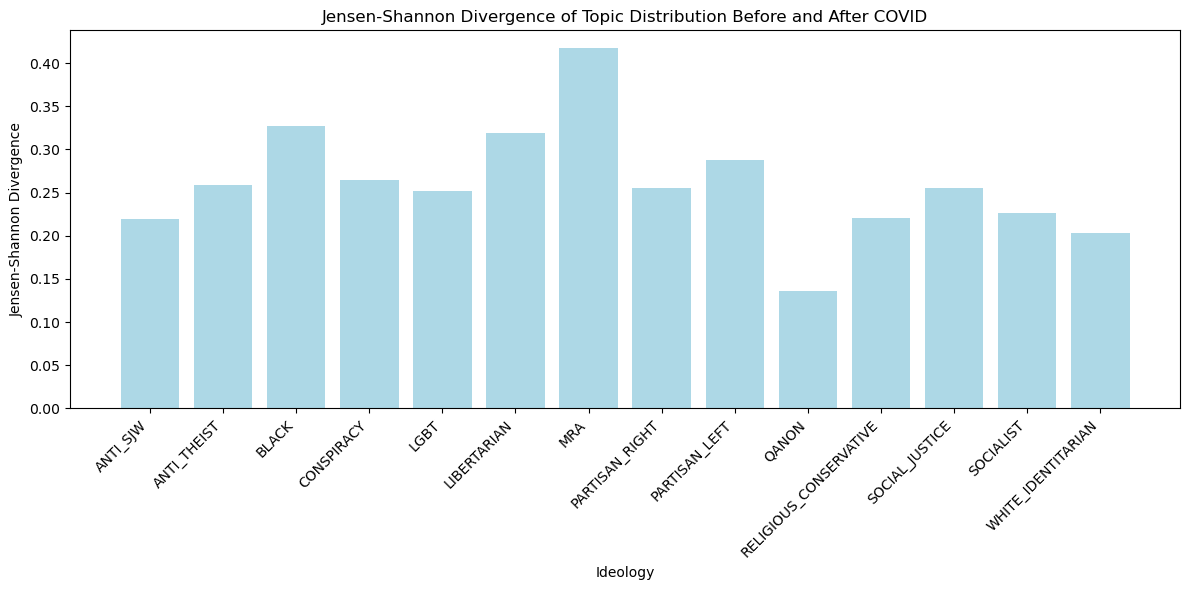

In [7]:
import matplotlib.pyplot as plt

# Prepare data for plotting
ideologies = list(js_divergence_results.keys())
js_values = list(js_divergence_results.values())

# Create a bar chart for JS divergence results
plt.figure(figsize=(12, 6))
plt.bar(ideologies, js_values, color='lightblue')
plt.xlabel('Ideology')
plt.ylabel('Jensen-Shannon Divergence')
plt.title('Jensen-Shannon Divergence of Topic Distribution Before and After COVID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()